**Data Cleaning**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('/content/World Population by country 2024.csv')

In [41]:
df.head(5)

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [42]:
df.tail(6)

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
228,Saint Pierre and Miquelon,5815,5840,242,24.00,-0.0043,NaN,229
229,Montserrat,4372,4386,102,43.00,-0.0032,NaN,230
230,Falkland Islands,3803,3791,12.2K,0.31,0.0032,NaN,231
231,Niue,1935,1935,261,7.00,0.0000,NaN,232
232,Tokelau,1915,1893,10,192.00,0.0116,NaN,233
233,Vatican City,526,518,< 1,1195.00,0.0154,NaN,234


In [43]:
print(f'the no of rows are {df.shape[0]}')
print(f'the no of columns are {df.shape[1]}')

the no of rows are 234
the no of columns are 8


In [44]:
df.index

RangeIndex(start=0, stop=234, step=1)

In [45]:
df.columns

Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
      dtype='object')

In [46]:
data_Types=df.dtypes
data_Types

,0
Country,object
Population 2024,int64
Population 2023,int64
Area (km2),object
Density (/km2),float64
Growth Rate,float64
World %,float64
World Rank,int64


In [47]:
df.isnull().sum()

,0
Country,0
Population 2024,0
Population 2023,0
Area (km2),0
Density (/km2),0
Growth Rate,0
World %,6
World Rank,0


In [48]:
df.dropnans=df.dropna(inplace=True)

In [49]:
print(f'the no of rows are {df.shape[0]} after dropping')

the no of rows are 228 after dropping


In [50]:
df.columns = ['Country' ,'Population 2024', 'Population 2023', 'Area(KM2)', 'Density(KM2)', 'Growth_Rate', 'World(%)', 'World_Rank']

In [51]:
df.describe()

,Population 2024,Population 2023,Density(KM2),Growth_Rate,World(%),World_Rank
count,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.00000
mean,3.560139e+07,3.527893e+07,459.320789,0.009343,0.004446,114.50000
std,1.397712e+08,1.390751e+08,2014.781372,0.011424,0.017459,65.96211
min,1.101900e+04,1.099400e+04,0.140000,-0.030900,0.000000,1.00000
25%,6.029420e+05,5.958262e+05,41.750000,0.002000,0.000100,57.75000
50%,5.996202e+06,5.962818e+06,100.000000,0.008000,0.000750,114.50000
75%,2.409886e+07,2.345109e+07,249.000000,0.016150,0.003000,171.25000
max,1.441720e+09,1.428628e+09,21674.000000,0.048300,0.180100,228.00000


In [52]:
mean_population = np.mean(df['Population 2023'])
median_population = np.median(df['Population 2023'])
mode_population = df['Population 2023'].mode()[0]

print('Mean Population:', mean_population)
print('Median Population:', median_population)
print('Mode Population:', mode_population)

Mean Population: 35278934.328947365
Median Population: 5962818.0
Mode Population: 10994


In [53]:
mean_population = np.mean(df['Population 2024'])
median_population = np.median(df['Population 2024'])
mode_population = df['Population 2024'].mode()[0]

print('Mean Population:', mean_population)
print('Median Population:', median_population)
print('Mode Population:', mode_population)

Mean Population: 35601393.05701754
Median Population: 5996202.0
Mode Population: 11019


**Data Visualization**

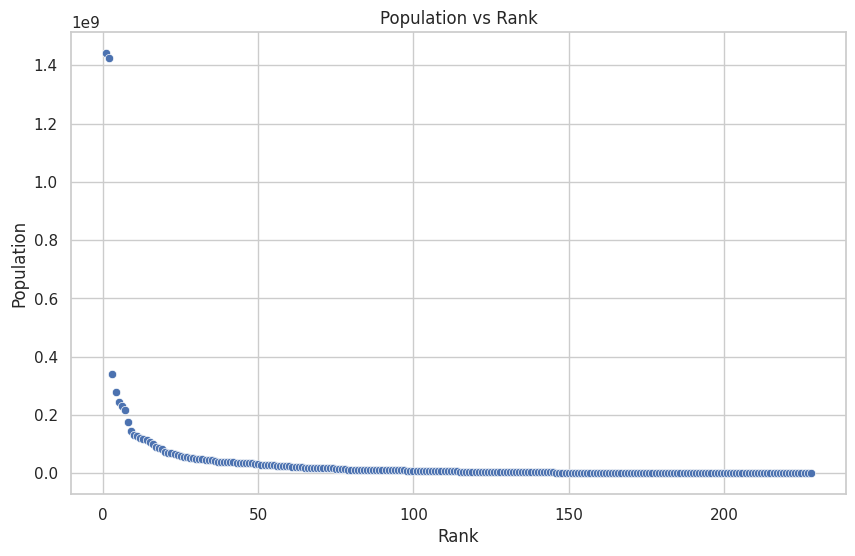

In [23]:
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

# Create scatterplot
sns.scatterplot(x="World_Rank", y="Population 2024", data=df)

# Set title and labels
plt.title("Population vs Rank")
plt.xlabel("Rank")
plt.ylabel("Population")

# Show plot
plt.show()

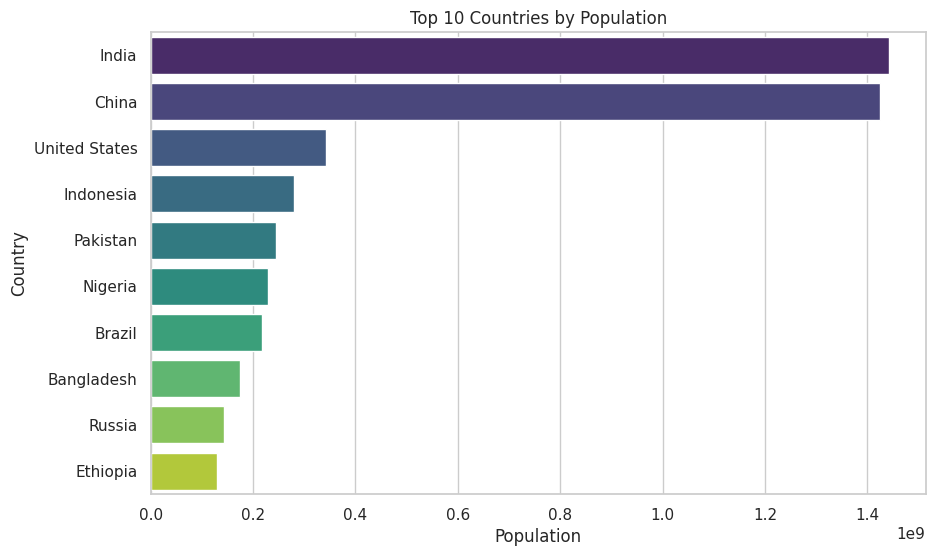

In [24]:
plt.figure(figsize=(10, 6))

# Sort data by population
sorted_data = df.sort_values("Population 2024", ascending=False)

# Create bar chart
sns.barplot(x="Population 2024", y="Country", data=sorted_data.head(10), palette="viridis")

# Set title and labels
plt.title("Top 10 Countries by Population")
plt.xlabel("Population")
plt.ylabel("Country")

# Show plot
plt.show()

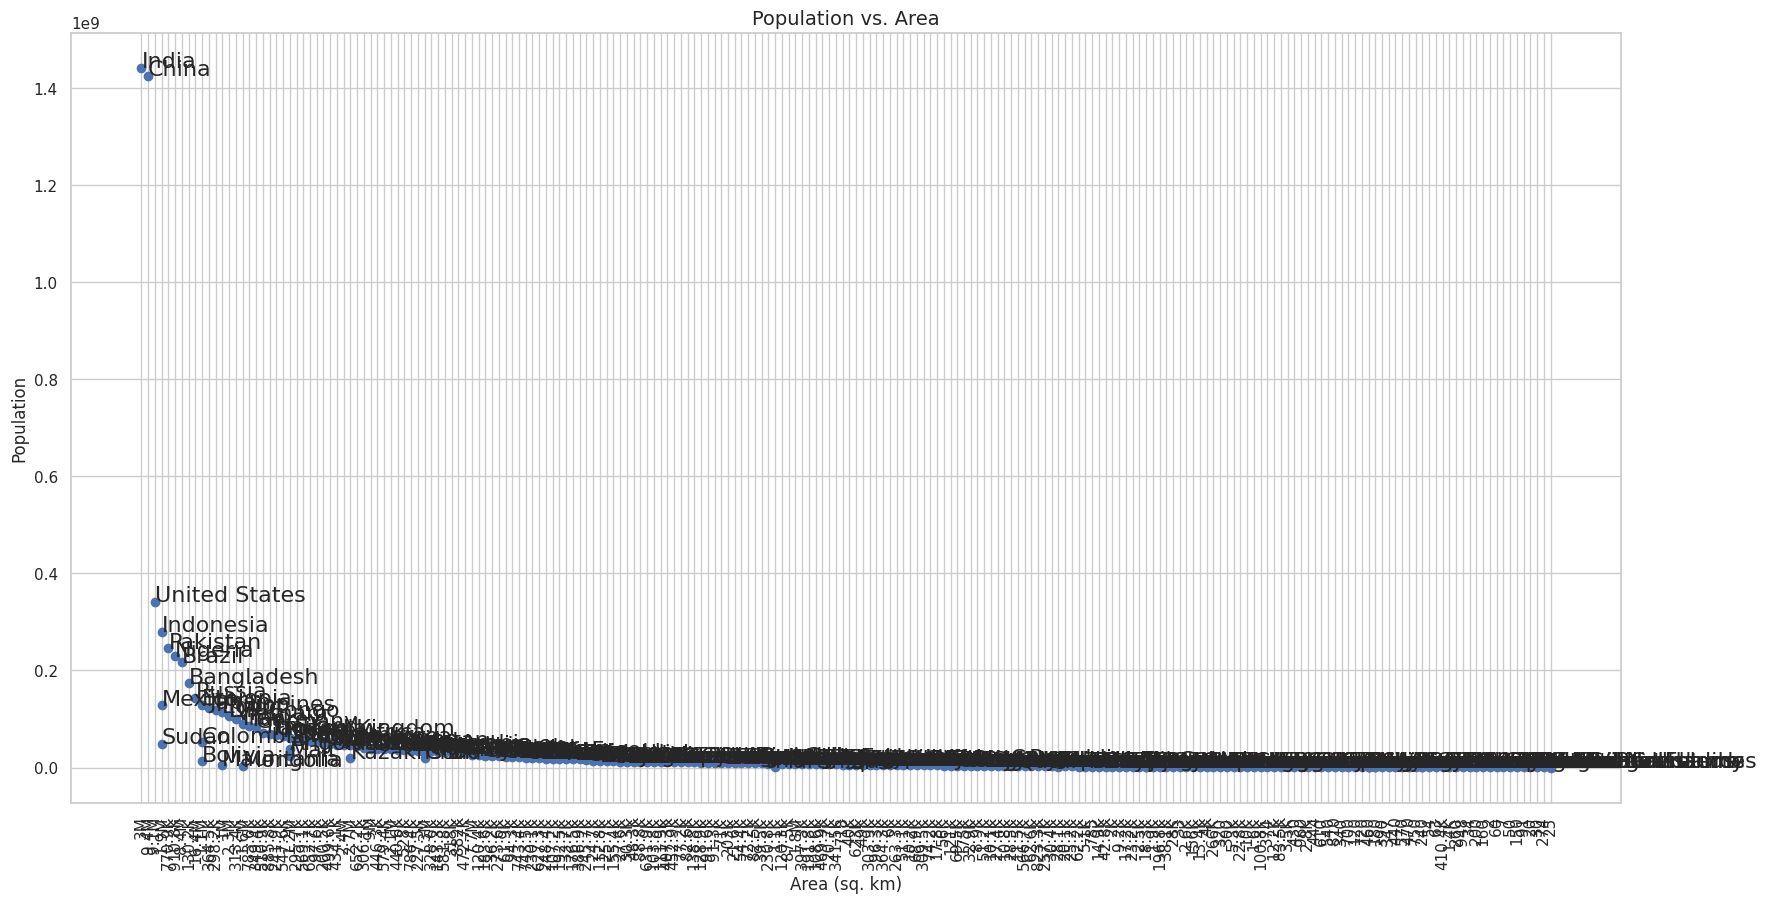

In [25]:
# create figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# create scatter plot
ax.scatter(df['Area(KM2)'], df['Population 2024'])

# add labels for each country
for i in range(len(df)):
    ax.annotate(df['Country'][i], (df['Area(KM2)'][i], df['Population 2024'][i]), fontsize=16)

# set axis labels and title
ax.set_xlabel('Area (sq. km)', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population vs. Area', fontsize=14)

plt.xticks(rotation=90)
# display the plot
plt.show()

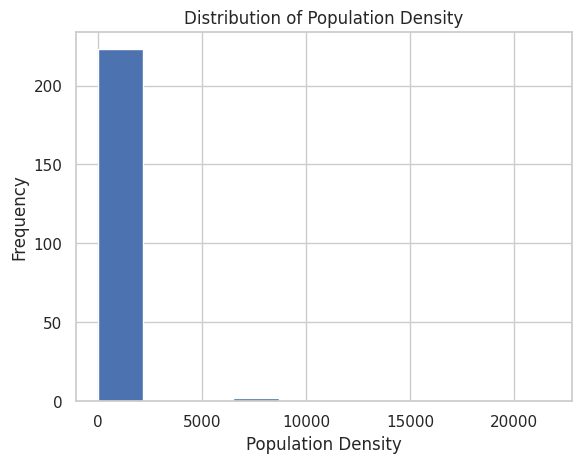

In [26]:

plt.hist(df['Density(KM2)'], bins=10)

# set axis labels and title
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.title('Distribution of Population Density')

# display the plot
plt.show()

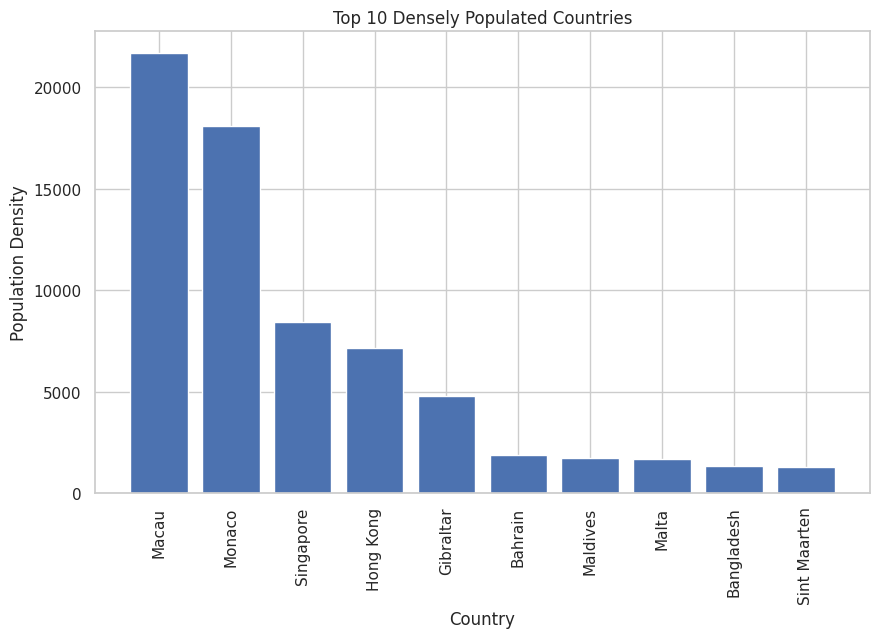

In [27]:
# create a new dataframe sorted by population density in descending order
world_population_density = df.sort_values('Density(KM2)', ascending=False)

# top 10 densely populated countries
top_10_dense = world_population_density.head(10)

# plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_dense['Country'], top_10_dense['Density(KM2)'],)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.title('Top 10 Densely Populated Countries')
plt.show()

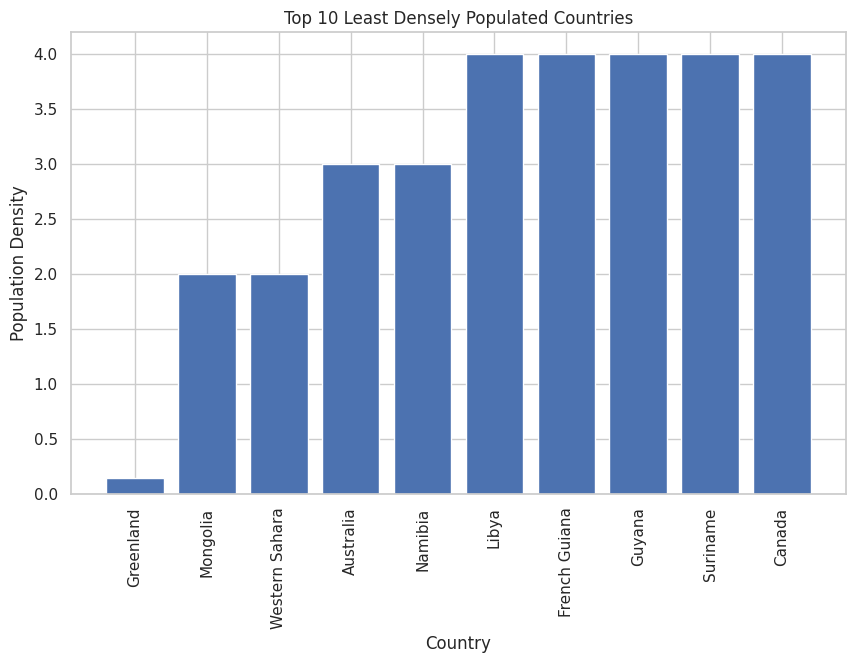

In [28]:
# create a new dataframe sorted by population density in ascending order
world_population_density = df.sort_values('Density(KM2)', ascending=True)

# top 10 least densely populated countries
top_10_least_dense = world_population_density.head(10)

# plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_least_dense['Country'], top_10_least_dense['Density(KM2)'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.title('Top 10 Least Densely Populated Countries')
plt.show()

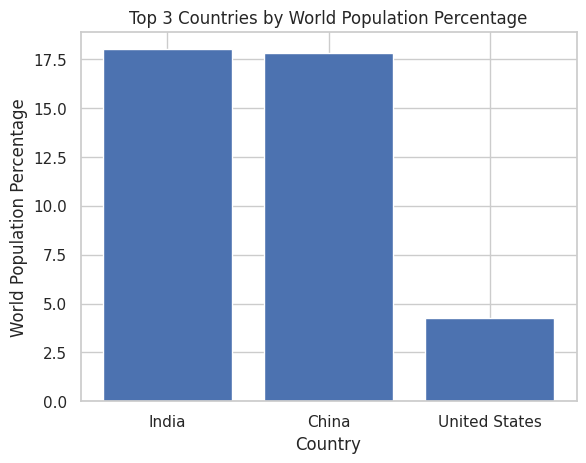

In [54]:
df['World(%)']=df['World(%)']*100
# sort dataframe by "world percentage" in descending order
world_population_percentage = df.sort_values('World(%)', ascending=False)

# create bar plot of top 3 countries by world percentage
top_3_world_percentage = world_population_percentage.head(3)
plt.bar(top_3_world_percentage['Country'], top_3_world_percentage['World(%)'])
plt.xlabel('Country')
plt.ylabel('World Population Percentage')
plt.title('Top 3 Countries by World Population Percentage')
plt.show()

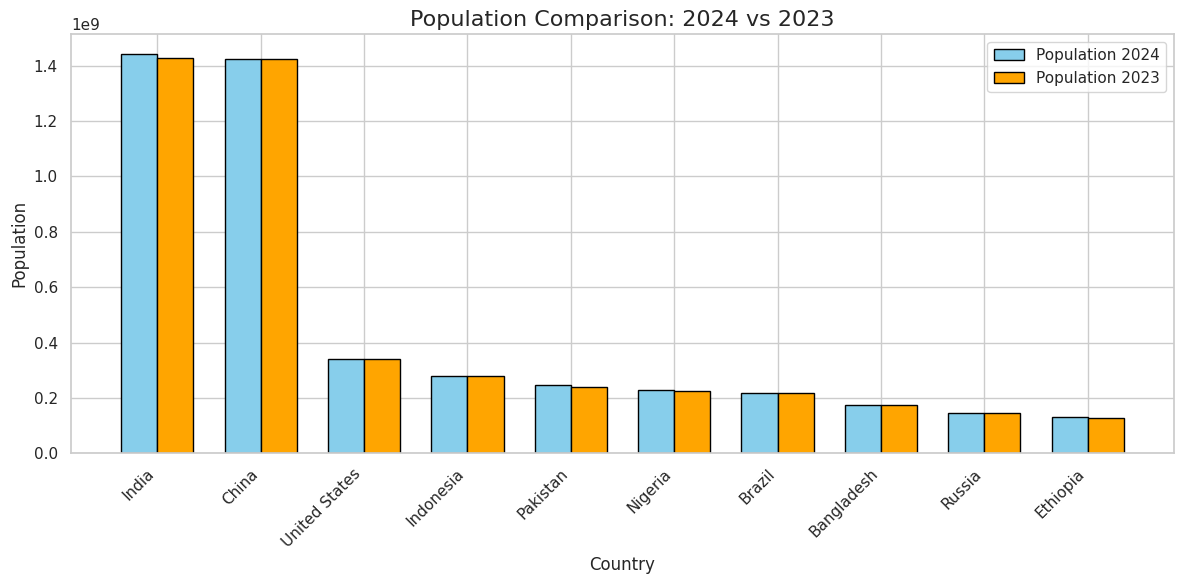

In [38]:
# Select relevant columns for comparison
comparison_df = df[['Country', 'Population 2024', 'Population 2023']].head(10)  # Top 10 countries for better clarity

# Set up bar positions for grouped bars
x = np.arange(len(comparison_df['Country']))  # Position of countries
width = 0.35  # Bar width

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison_df['Population 2024'], width, label='Population 2024', color='skyblue', edgecolor='black')
plt.bar(x + width/2, comparison_df['Population 2023'], width, label='Population 2023', color='orange', edgecolor='black')

# Add labels, title, and legend
plt.title('Population Comparison: 2024 vs 2023', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(x, comparison_df['Country'], rotation=45, ha='right')  # Add country names as x-axis labels
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
